<h2><font color="#004D7F" size=6>Módulo 3. Procesamiento de datos</font></h2>



<h1><font color="#004D7F" size=5>2. Transformación de datos</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Manuel Castillo-Cara</font><br>
<font color="#004D7F" size=3>Machine Learning con Python</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Librerías y CSV](#section11)
* [2. Transformaciones](#section2)
    * [2.1. Escalamiento](#section21)
    * [2.2. Estandarización](#section22)
    * [2.3. Normalización](#section23)
    * [2.4. Binarización](#section24)
    * [2.5. Box-Cox](#section25)
    * [2.6. Yeo-Johnson](#section26)

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

Los datos en bruto, sin analizar de antemano, muy difícilmente nos va a dar precisiones robustas ya que, entre otros aspectos, muchos de ellos requieren los datos en una forma específica, por lo que deberemos realizar una transformación del conjunto de datos. Por otro lado, otros algoritmos pueden funcionar mejor si los datos se preparan de una manera específica, por ejemplo, los de tipo árbol con atributos característica de tipo nominal. Por tanto, es de vital importancia realizar un preprocesamiento a nuestro datos como parte fundamental de realizar un proyecto de machine learning.

<a id="section11"></a>
## <font color="#004D7F"> 1.1. Librerías y CSV</font>

Para esta práctica vamos a cargar el conjunto de datos de Pima Indian Diabetes y trabajar diferentes tipos de transformaciones de datos. Así mismo, en algunas de ellas vamos a trabajar otros conjuntos de datos para ver un mejor impacto en su transformación.

Por otro lado, en cuanto a las librerías, vamos a ver llamarlas según cada transformación. Tenga en cuenta que estas trasnformaciónes vamos a trabajarlas con la librería **Scikit-learn**.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
filename = "pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(filename, names=names)
array = data.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
print(X)

[[  6.  148.   72.  ...  33.6 627.   50. ]
 [  1.   85.   66.  ...  26.6 351.   31. ]
 [  8.  183.   64.  ...  23.3 672.   32. ]
 ...
 [  5.  121.   72.  ...  26.2 245.   30. ]
 [  1.  126.   60.  ...  30.1 349.   47. ]
 [  1.   93.   70.  ...  30.4 315.   23. ]]


<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a>
## <font color="#004D7F"> 2. Transformaciones</font>

El método de ajuste y transformación múltiple es el enfoque preferido. Llama a la función `fit()` para preparar los parámetros de la transformación una vez en sus datos. Luego, puede usar la función `transform()` en los mismos datos para prepararlos para el modelado y nuevamente en el conjunto de datos de prueba o validación o los nuevos datos que puede ver en el futuro. El ajuste y transformación combinados es una conveniencia que puede usar para tareas únicas. Esto puede ser útil si está interesado en trazar o resumir los datos transformados y se utilizará la función `fit_transform()`. Puede revisar la API [**sklearn.preprocessing**](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing). Como puede verse existe una gran cantidad de funciones que podemos aplicar en esta fase de preprocesamiento según la necesidad de nuestros datos.

Es importante ver como quedan los datos antes y después de transformarlos. En el siguiente código puede ver como quedan los datos originales y comparlos con cada transformación.

<ipython-input-3-1f73aff37f44>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["preg"], ax=axes[0, 0])
<ipython-input-3-1f73aff37f44>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["plas"], ax=axes[0, 1])
<ipython-input-3-1f73aff37f44>:8: UserWarning: 

`distplot` is a deprecated fu

<Axes: xlabel='age', ylabel='Density'>

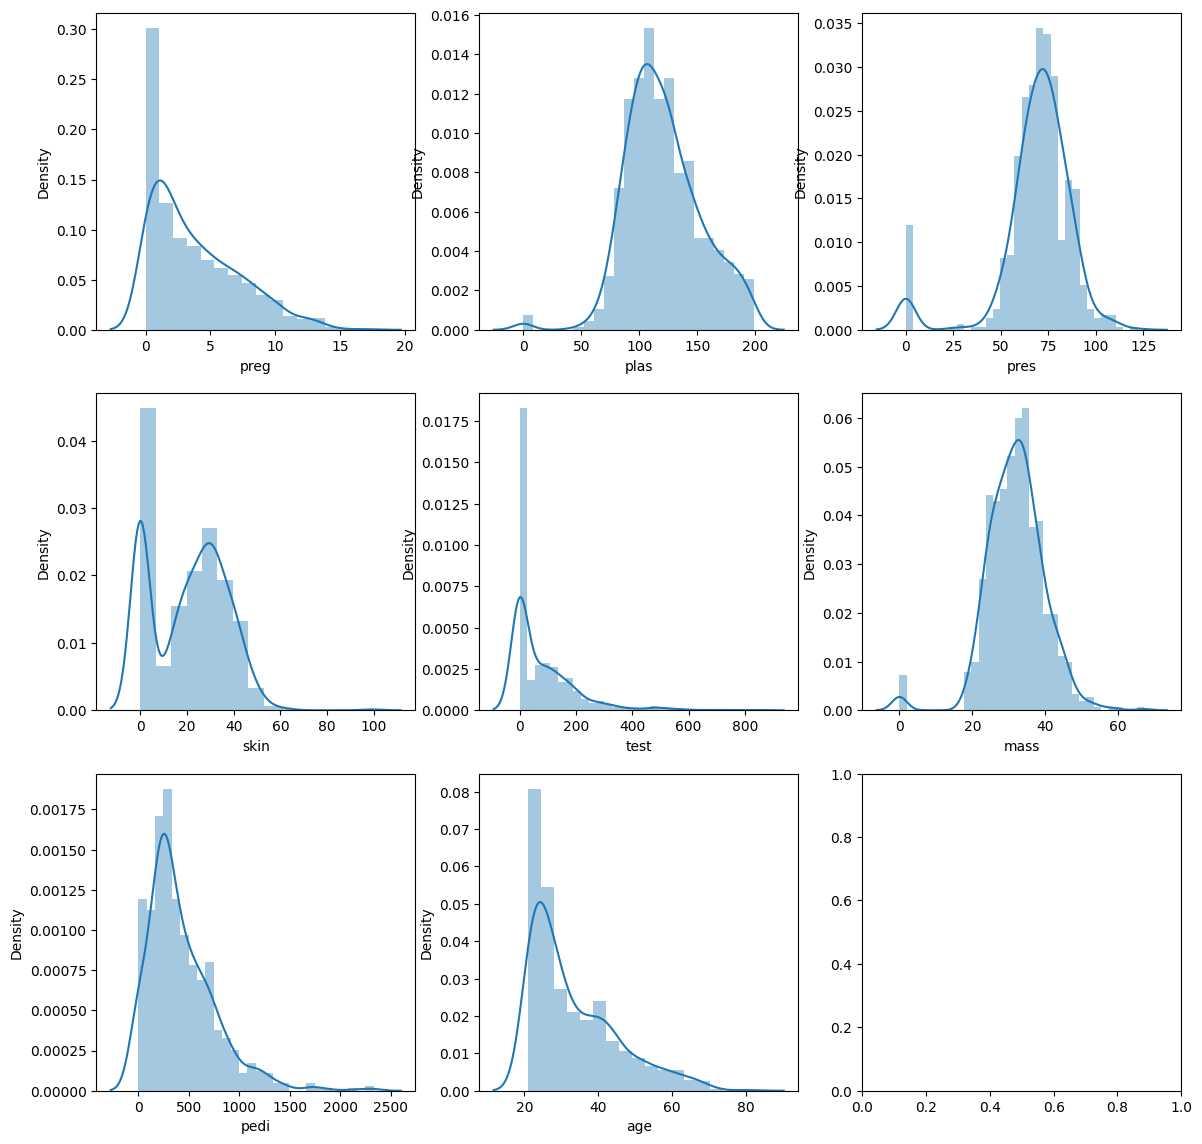

In [3]:
%matplotlib inline
# Univariate Histograms
import matplotlib.pyplot as plt
import seaborn as sns
f, axes = plt.subplots(3, 3, figsize=(14, 14))
sns.distplot(data["preg"], ax=axes[0, 0])
sns.distplot(data["plas"], ax=axes[0, 1])
sns.distplot(data["pres"], ax=axes[0, 2])
sns.distplot(data["skin"], ax=axes[1, 0])
sns.distplot(data["test"], ax=axes[1, 1])
sns.distplot(data["mass"], ax=axes[1, 2])
sns.distplot(data["pedi"], ax=axes[2, 0])
sns.distplot(data["age"], ax=axes[2, 1])
#sns.distplot(data["class"], ax=axes[2, 2])

<a id="section21"></a>
## <font color="#004D7F"> 2.1. Escalamiento</font>

Esta transformación es útil para los algoritmos de optimización utilizados en el núcleo de los algoritmos de aprendizaje automático como Gradiente Descendiente. También es útil para algoritmos que ponderan entradas como Regression y Neural Networks y algoritmos que usan medidas de distancia como _k_-Nearest Neighbours. Puede reescalar sus datos usando la clase [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

Después de reescalar puede ver que todos los valores están en el rango $[0,1]$,

In [ ]:
!pip install sklearn.preprocessing

In [4]:
# Rescale data (between 0 and 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)
np.set_printoptions(precision=3)
print(names)
print(rescaledX[0:5, : ])
# summarize transformed data


['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
[[0.353 0.744 0.59  0.354 0.    0.501 0.269 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.151 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.289 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.072 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.982 0.2  ]]


In [ ]:
# Convertimos el Numpy Array a dataframe
???

,preg,plas,pres,skin,test,mass,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.269183,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.150672,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.288505,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.071665,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.982395,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.073382,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.000103,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.105157,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.149813,0.433333


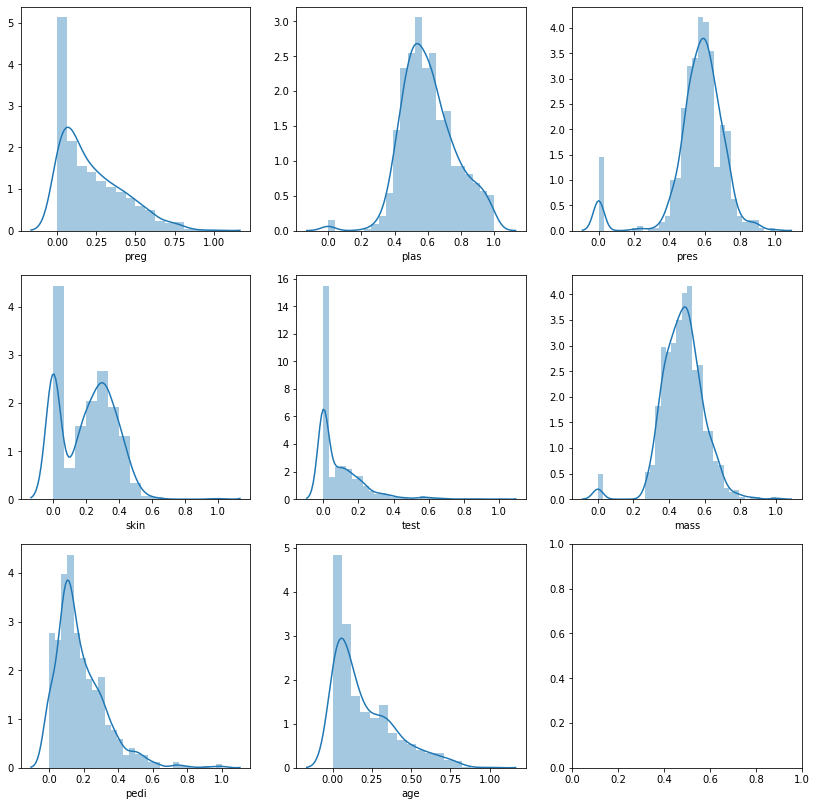

In [ ]:
%matplotlib inline
# Univariate Histograms
import matplotlib.pyplot as plt
import seaborn as sns
f, axes = plt.subplots(3, 3, figsize=(14, 14))
sns.distplot(transform_df["preg"], ax=axes[0, 0])
sns.distplot(transform_df["plas"], ax=axes[0, 1])
sns.distplot(transform_df["pres"], ax=axes[0, 2])
sns.distplot(transform_df["skin"], ax=axes[1, 0])
sns.distplot(transform_df["test"], ax=axes[1, 1])
sns.distplot(transform_df["mass"], ax=axes[1, 2])
sns.distplot(transform_df["pedi"], ax=axes[2, 0])
sns.distplot(transform_df["age"], ax=axes[2, 1])


<a id="section22"></a>
## <font color="#004D7F"> 2.2. Estandarización</font>

Es más adecuada para técnicas que asumen una distribución gaussiana en las variables de entrada y funcionan mejor con datos reescalados, como Linear Regression, Logistic Regression y Linear Discriminant Analysis. Puede estandarizar datos utilizando la clase [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Los valores para cada atributo ahora tienen un valor medio de $0$ y una desviación estándar de $1$

In [ ]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
print(names)
print(X[0:5, :])
# summarize transformed data


['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e+02
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e+02
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e+02
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e+02
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+03
  3.300e+01]]


In [ ]:
# Convertimos el Numpy Array a dataframe
???

,preg,plas,pres,skin,test,mass,pedi,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.584149,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.226986,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.716400,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.767743,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.465654,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.755987,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-1.257539,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.538509,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.232864,1.170732


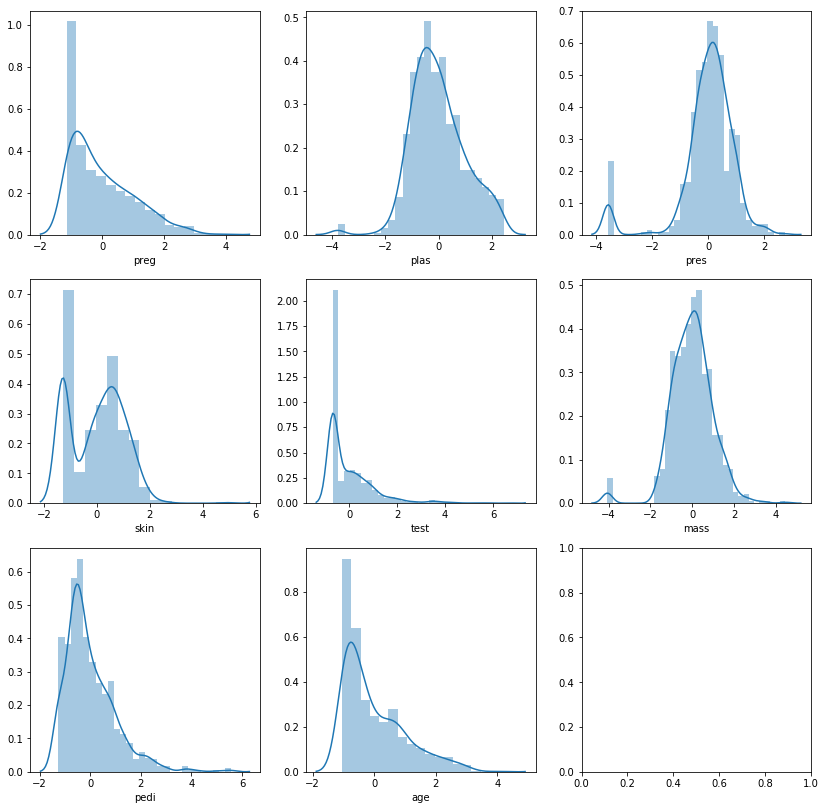

In [ ]:
%matplotlib inline
# Univariate Histograms
import matplotlib.pyplot as plt
import seaborn as sns
f, axes = plt.subplots(3, 3, figsize=(14, 14))
sns.distplot(transform_df["preg"], ax=axes[0, 0])
sns.distplot(transform_df["plas"], ax=axes[0, 1])
sns.distplot(transform_df["pres"], ax=axes[0, 2])
sns.distplot(transform_df["skin"], ax=axes[1, 0])
sns.distplot(transform_df["test"], ax=axes[1, 1])
sns.distplot(transform_df["mass"], ax=axes[1, 2])
sns.distplot(transform_df["pedi"], ax=axes[2, 0])
sns.distplot(transform_df["age"], ax=axes[2, 1])


<a id="section23"></a>
## <font color="#004D7F"> 2.3. Normalización</font>

Este método de preprocesamiento puede ser útil para conjuntos de datos dispersos (muchos ceros) con atributos de escalas variables cuando se utilizan algoritmos que ponderan valores de entrada como Neural Networks y algoritmos que usan medidas de distancia como k-Nearest Neighbours.

Puede normalizar datos en Python con la clase [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html). Las filas están normalizadas a la longitud $1$

In [ ]:
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
print(names)
print(normalizedX[0:5 , : ])
# summarize transformed data


['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
[[0.009 0.227 0.11  0.054 0.    0.052 0.962 0.077]
 [0.003 0.229 0.178 0.078 0.    0.072 0.947 0.084]
 [0.011 0.261 0.091 0.    0.    0.033 0.959 0.046]
 [0.004 0.395 0.293 0.102 0.417 0.125 0.741 0.093]
 [0.    0.06  0.017 0.015 0.073 0.019 0.995 0.014]]


In [ ]:
# Convertimos el Numpy Array a dataframe
transform_df = pd.DataFrame(???, columns=names[0:8])
transform_df

,preg,plas,pres,skin,test,mass,pedi,age
0,0.009202,0.226993,0.110429,0.053681,0.000000,0.051534,0.961653,0.076687
1,0.002699,0.229401,0.178123,0.078266,0.000000,0.071789,0.947291,0.083664
2,0.011419,0.261215,0.091354,0.000000,0.000000,0.033259,0.959217,0.045677
3,0.004438,0.395019,0.292935,0.102084,0.417211,0.124719,0.741216,0.093207
4,0.000000,0.059578,0.017395,0.015221,0.073059,0.018743,0.994998,0.014351
...,...,...,...,...,...,...,...,...
763,0.034285,0.346278,0.260565,0.164568,0.617128,0.112797,0.586272,0.215995
764,0.013304,0.811526,0.465629,0.179600,0.000000,0.244788,0.002262,0.179600
765,0.016262,0.393541,0.234173,0.074805,0.364270,0.085213,0.796840,0.097572
766,0.002632,0.331587,0.157899,0.000000,0.000000,0.079212,0.918443,0.123687


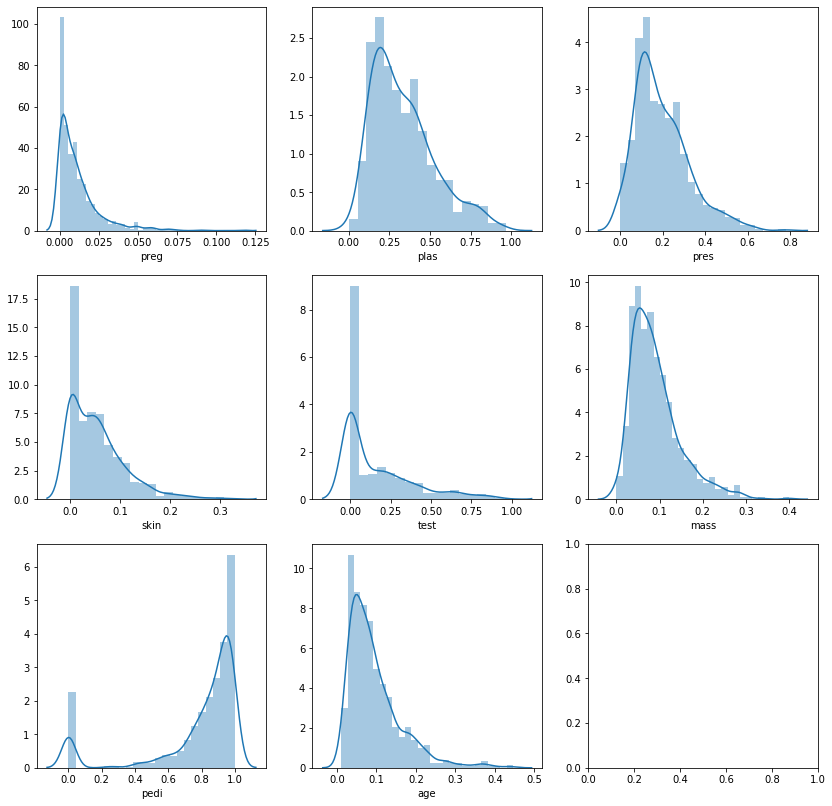

In [ ]:
%matplotlib inline
# Univariate Histograms
import matplotlib.pyplot as plt
import seaborn as sns
f, axes = plt.subplots(3, 3, figsize=(14, 14))
sns.distplot(transform_df["preg"], ax=axes[0, 0])
sns.distplot(transform_df["plas"], ax=axes[0, 1])
sns.distplot(transform_df["pres"], ax=axes[0, 2])
sns.distplot(transform_df["skin"], ax=axes[1, 0])
sns.distplot(transform_df["test"], ax=axes[1, 1])
sns.distplot(transform_df["mass"], ax=axes[1, 2])
sns.distplot(transform_df["pedi"], ax=axes[2, 0])
sns.distplot(transform_df["age"], ax=axes[2, 1])


<a id="section24"></a>
## <font color="#004D7F"> 2.4. Binarización</font>

Puede crear nuevos atributos binarios en Python usando la clase [Binarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html). Puede ver que todos los valores iguales o menores que 0 están marcados con 0 y todos los que están por encima de 0 están marcados con 1.

In [ ]:
# binarization
from sklearn.preprocessing import Binarizer
scaler = Binarizer(threshold= 0.0).fit(X)
binarizedX = scaler.transform(X)
print(names)
print(binarizedX[0:5, :])
# summarize transformed data


['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


In [ ]:
# Convertimos el Numpy Array a dataframe
transform_df = pd.DataFrame(binarizedX, columns=names[0:8])
transform_df

,preg,plas,pres,skin,test,mass,pedi,age
0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
763,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
764,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
765,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
766,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0


/home/manwest/Documentos/enviroment/modulo1/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/manwest/Documentos/enviroment/modulo1/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


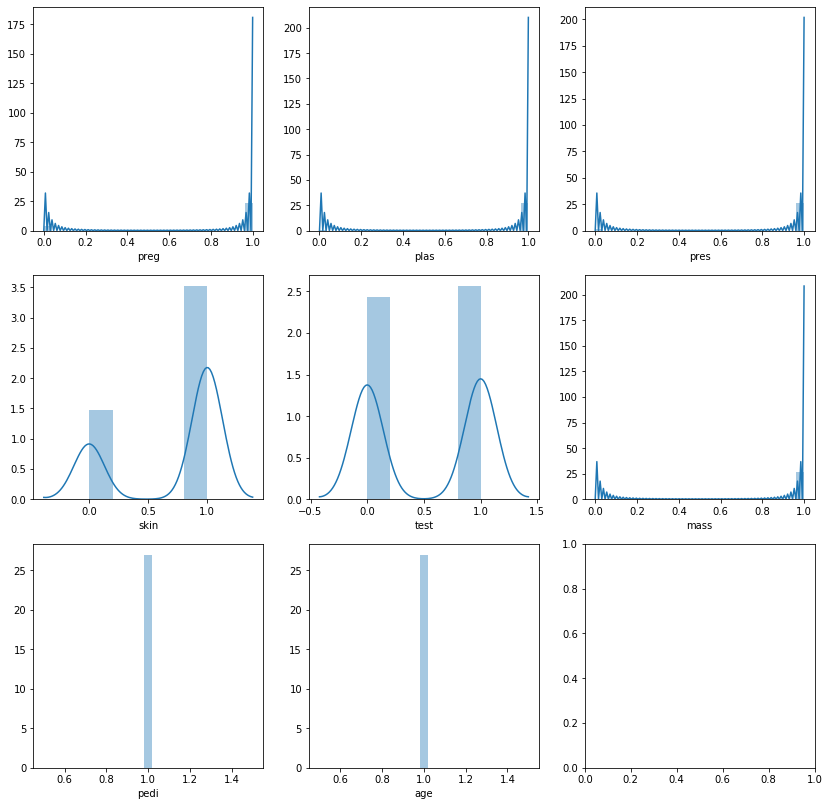

In [ ]:
%matplotlib inline
# Univariate Histograms
import matplotlib.pyplot as plt
import seaborn as sns
f, axes = plt.subplots(3, 3, figsize=(14, 14))
sns.distplot(transform_df["preg"], ax=axes[0, 0])
sns.distplot(transform_df["plas"], ax=axes[0, 1])
sns.distplot(transform_df["pres"], ax=axes[0, 2])
sns.distplot(transform_df["skin"], ax=axes[1, 0])
sns.distplot(transform_df["test"], ax=axes[1, 1])
sns.distplot(transform_df["mass"], ax=axes[1, 2])
sns.distplot(transform_df["pedi"], ax=axes[2, 0])
sns.distplot(transform_df["age"], ax=axes[2, 1])


<a id="section25"></a>
## <font color="#004D7F"> 2.5. Box-Cox</font>

En ocasiones los atributos representan el llamado sesgo o inclinación, que es cuando un atributo tiene una distribución similar a la Gaussiana pero esta se encuentra desplazada. Para este tipo de casos, se utiliza la transformación Box-Cox, la cual asume que todos los valores son positivos, que lo que realiza es el sesgo y hacer más Gaussiana la distribución de este atributo. Nótese que aplicamos la transformación sólo a dos atributos que parecen tener un sesgo.

<ipython-input-5-06dcac98fd1c>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(421)
<ipython-input-5-06dcac98fd1c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['pedi'])
<ipython-input-5-06dcac98fd1c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new 

<Figure size 640x480 with 0 Axes>

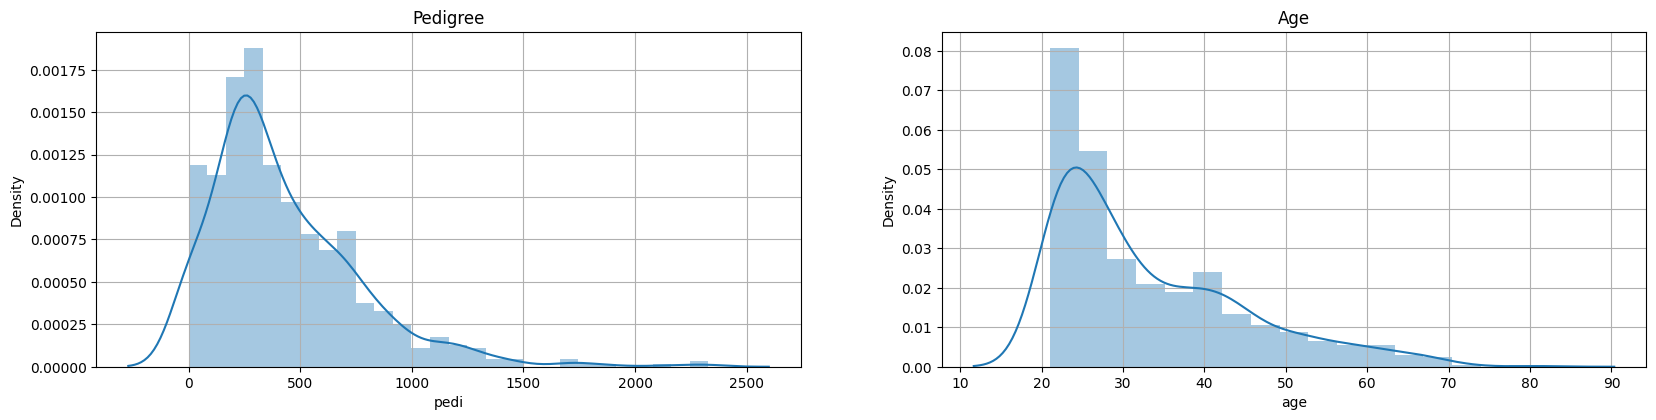

In [5]:
# Univariate Histograms
plt.figure(1)
plt.subplots(figsize=(20,20))
plt.subplot(421)
sns.distplot(data['pedi'])
plt.title('Pedigree')
plt.grid(True)
plt.subplot(422)
sns.distplot(data['age'])
plt.title('Age')
plt.grid(True)
plt.show()


Como vemos, ese sesgo tenemos que corregirlo y para ello utilizaremos la clase [PowerTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html). Una vez realizada la transformación podemos ver como se encuentra corregido el sesgo inicial de ambas características.

In [6]:
# Box-Cox Transform

#instatiate
from sklearn.preprocessing import PowerTransformer
# extract features with skew
features = data[['pedi', 'age']]

#Fit the data to the powertransformer
pt = PowerTransformer(method='box-cox', standardize=True)

#Lets get the Lambdas that were found
#print (skl_boxcox.lambdas_)
skl_boxcox = pt.fit(features)
calc_lambdas = skl_boxcox.lambdas_
#Transform the data
skl_boxcox = pt.transform(features)

#Pass the transformed data into a new dataframe
df_features = pd.DataFrame(data = skl_boxcox, columns=['pedi', 'age'])

# Pass to the original dataframe the transform columns
data.drop(['age'], axis = 1, inplace=True)
data.drop(['pedi'], axis = 1, inplace=True)

# Concatenar ambos dataframes
df_data = pd.concat([data, df_features], axis = 1)

cols = df_data.columns.tolist()

# Pasa e útimo elemento al primero de la lista (2 veces)
cols = cols[-1:]+ cols[:-1]
cols = cols[-1:]+ cols[:-1]
df_data = df_data[cols]
df_data
# Sobreescrimos


,pedi,age,preg,plas,pres,skin,test,mass,class
0,0.717716,1.362797,6,148,72,35,0,33.6,1
1,0.018768,0.127990,1,85,66,29,0,26.6,0
2,0.814658,0.231506,8,183,64,0,0,23.3,1
3,-0.638772,-1.483064,1,89,66,23,94,28.1,0
4,3.167741,0.328461,0,137,40,35,168,43.1,1
...,...,...,...,...,...,...,...,...,...
763,-0.621159,1.764261,10,101,76,48,180,32.9,0
764,-2.130657,-0.366775,2,122,70,27,0,36.8,0
765,-0.328074,0.017237,5,121,72,23,112,26.2,0
766,0.012785,1.236934,1,126,60,0,0,30.1,1


In [7]:
df_data

,pedi,age,preg,plas,pres,skin,test,mass,class
0,0.717716,1.362797,6,148,72,35,0,33.6,1
1,0.018768,0.127990,1,85,66,29,0,26.6,0
2,0.814658,0.231506,8,183,64,0,0,23.3,1
3,-0.638772,-1.483064,1,89,66,23,94,28.1,0
4,3.167741,0.328461,0,137,40,35,168,43.1,1
...,...,...,...,...,...,...,...,...,...
763,-0.621159,1.764261,10,101,76,48,180,32.9,0
764,-2.130657,-0.366775,2,122,70,27,0,36.8,0
765,-0.328074,0.017237,5,121,72,23,112,26.2,0
766,0.012785,1.236934,1,126,60,0,0,30.1,1


<ipython-input-8-70caff96c417>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(421)
<ipython-input-8-70caff96c417>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_data['pedi'])
<ipython-input-8-70caff96c417>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the 

<Figure size 640x480 with 0 Axes>

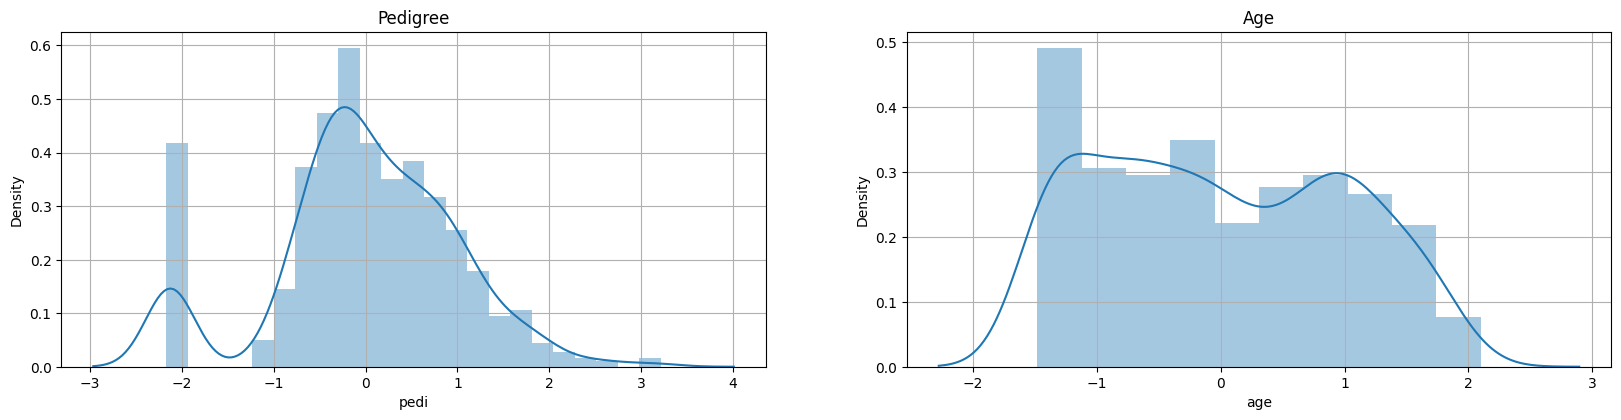

In [8]:
# Univariate Histograms
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.figure(1)
plt.subplots(figsize=(20,20))
plt.subplot(421)
sns.distplot(df_data['pedi'])
plt.title('Pedigree')
plt.grid(True)
plt.subplot(422)
sns.distplot(df_data['age'])
plt.title('Age')
plt.grid(True)
plt.show()

### Yeo Johnson

<a id="section26"></a>
## <font color="#004D7F"> 2.6. Yeo-Johnson</font>

La transformación de Yeo-Johnson es otra transformación de potencia como Box-Cox, pero soporta valores en bruto (sin procesar) que son iguales a cero y negativos. Para utilizar esta transformación únicamente tenemos que poner en la propiedad `method` de la clase `PowerTransformer` el valor `yeo-johnson` o directamente no poner `method` ya que por defecto utiliza esta transoformación.

In [10]:
# Yeo-Johnson Transform
#instatiate
from sklearn.preprocessing import PowerTransformer
# extract features with skew
features = data[['pedi', 'age']]

#Fit the data to the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)

#Lets get the Lambdas that were found
#print (skl_boxcox.lambdas_)
skl_boxcox = pt.fit(features)
calc_lambdas = skl_boxcox.lambdas_
#Transform the data
skl_boxcox = pt.transform(features)

#Pass the transformed data into a new dataframe
df_features = pd.DataFrame(data = skl_boxcox, columns=['pedi', 'age'])

# Pass to the original dataframe the transform columns
data.drop(['age'], axis = 1, inplace=True)
data.drop(['pedi'], axis = 1, inplace=True)

# Concatenar ambos dataframes
df_data = pd.concat([data, df_features], axis = 1)

cols = df_data.columns.tolist()

# Pasa e útimo elemento al primero de la lista (2 veces)
cols = cols[-1:]+ cols[:-1]
cols = cols[-1:]+ cols[:-1]
df_data = df_data[cols]
df_data
# Sobreescrimos

,pedi,age,preg,plas,pres,skin,test,mass,class
0,0.720862,1.364180,6,148,72,35,0,33.6,1
1,0.005392,0.126452,1,85,66,29,0,26.6,0
2,0.820468,0.230161,8,183,64,0,0,23.3,1
3,-0.662166,-1.480075,1,89,66,23,94,28.1,0
4,3.258044,0.327328,0,137,40,35,168,43.1,1
...,...,...,...,...,...,...,...,...,...
763,-0.644375,1.765331,10,101,76,48,180,32.9,0
764,-2.074512,-0.368619,2,122,70,27,0,36.8,0
765,-0.347546,0.015535,5,121,72,23,112,26.2,0
766,-0.000709,1.238144,1,126,60,0,0,30.1,1


<ipython-input-11-f5206b3eed34>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(421)
<ipython-input-11-f5206b3eed34>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_data['pedi'])
<ipython-input-11-f5206b3eed34>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use t

<Figure size 640x480 with 0 Axes>

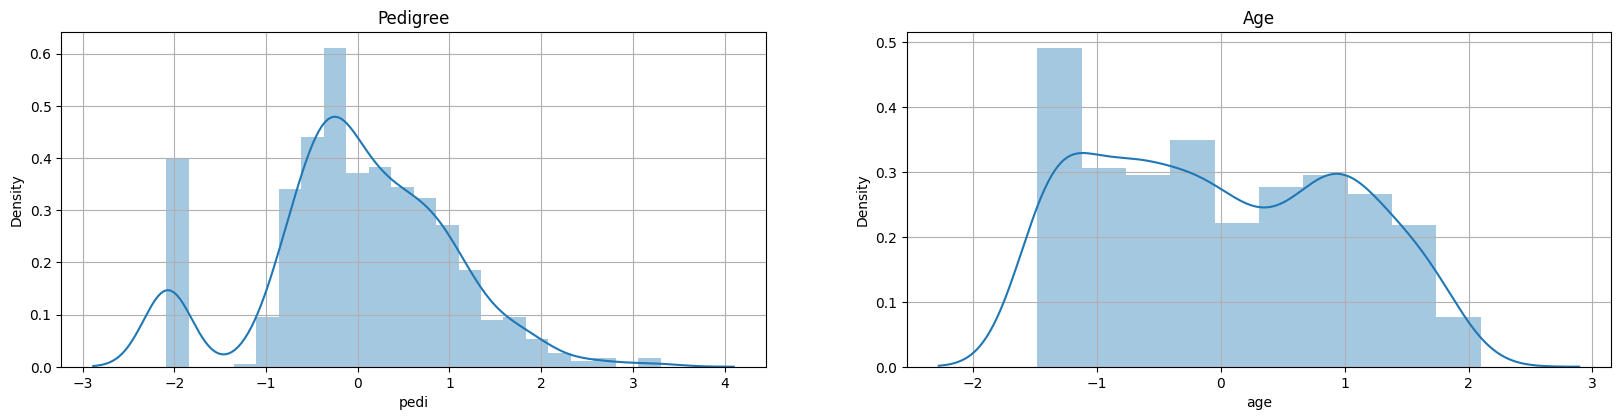

In [11]:
%matplotlib inline
# Univariate Histograms
plt.figure(1)
plt.subplots(figsize=(20,20))
plt.subplot(421)
sns.distplot(df_data['pedi'])
plt.title('Pedigree')
plt.grid(True)
plt.subplot(422)
sns.distplot(df_data['age'])
plt.title('Age')
plt.grid(True)
plt.show()

<a id="section26"></a>
### <font color="#004D7F"> Coeficiente Box-Cox y Yeo-Johnson</font>

Estas transforamciones surgen ya que en determinadas ocasionas se utilizan una transformación logarítmica o de raíz cuadrada a los datos pero sin saber muy bien cual de los dos tendrá una mejor incidencia. Estas dos transformaciones realizan ese análisis y establece la mejor transforamción para sus datos.

Podemos usar una versión generalizada de la transformación que encuentre un parámetro (lambda) que mejor transforme una variable en una distribución de probabilidad gaussiana (si logarítmica o raíz cuadrada, por ejemplo). Hay dos enfoques populares para tales transformaciones automáticas de energía; son:

Si nos hemos fijado `PowerTransform` tiene una propiedad llamada `lambdas_`, a menudo denominado lambda, se usa para controlar la naturaleza de la transformación. A continuación se presentan algunos valores comunes para _lambda:_
 * _lambda = -1_ es una transformación recíproca.
 * _lambda = -0.5_ es una transformación de raíz cuadrada recíproca.
 * _lambda = 0.0_ es una transformación logarítmica.
 * _lambda = 0.5_ es una transformación de raíz cuadrada.
 * _lambda = 1.0_ no es una transformación.

Veamos el coeficiente de de las dos variables son:

In [13]:

print(f"Lambda de Yeo-Johnson: {calc_lambdas}")

Lambda de Yeo-Johnson: [ 0.48 -1.15]


Podemos observar que a la primera variable le ha realizado una raíz cudrada recíproca y a la segunda una transforamción recíproca.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>